In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Food Composition.csv")

In [3]:
df.rename(columns={'ï»¿Public Food Key': 'Public Food Key'}, inplace=True)

In [4]:
df.drop(['Public Food Key','Food Profile ID','Derivation', 'Sampling Details', 'Nitrogen Factor', 'Fat Factor',
       'Specific Gravity', 'Analysed Portion', 'Unanalysed Portion','Classification'],axis=1,inplace=True)

In [5]:
df.head()

,Food Name,Food Description,Classification Name
0,"Cardamom seed, dried, ground",Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,"Cinnamon, dried, ground",Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,"Cloves, dried, ground","Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,"Coriander seed, dried, ground",Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,"Cumin (cummin) seed, dried, ground",Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [7]:
df['Food Name'] = df['Food Name'].apply(lambda text: ' '.join([remove_stopwords(item).translate(str.maketrans('','',string.punctuation))\
                                    .translate(str.maketrans('','',string.digits)) for item in text.split()]))
df.head()

,Food Name,Food Description,Classification Name
0,Cardamom seed dried ground,Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,Cinnamon dried ground,Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,Cloves dried ground,"Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,Coriander seed dried ground,Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,Cumin cummin seed dried ground,Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [8]:
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

df['Food Name'] = df['Food Name'].apply(lambda text: stemSentence(text))
df.head()

,Food Name,Food Description,Classification Name
0,cardamom seed dri ground,Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,cinnamon dri ground,Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,clove dri ground,"Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,coriand seed dri ground,Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,cumin cummin seed dri ground,Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [9]:
vectorizer = TfidfVectorizer(analyzer='word')
X = vectorizer.fit_transform(df['Food Name'])

In [10]:
model=KMeans(n_clusters=5) 

In [11]:
model=model.fit(X) 

In [12]:
tahmin=model.predict(X)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X,tahmin)

0.026305123064645986

In [24]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(X)
        pred=model.fit_predict(X)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(X,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.02194903872286033
Number of cluster 3,silhouette0.023872023561371174
Number of cluster 4,silhouette0.023294604773709073
Number of cluster 5,silhouette0.02535231138319225
Number of cluster 6,silhouette0.031007447082318843
Number of cluster 7,silhouette0.03581424963162797
Number of cluster 8,silhouette0.037758275918546656
Number of cluster 9,silhouette0.04143376529950379


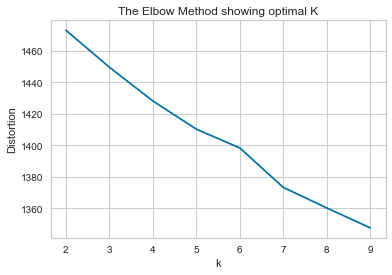

In [25]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(1, 12))

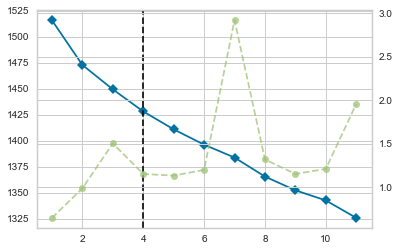

In [26]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X)

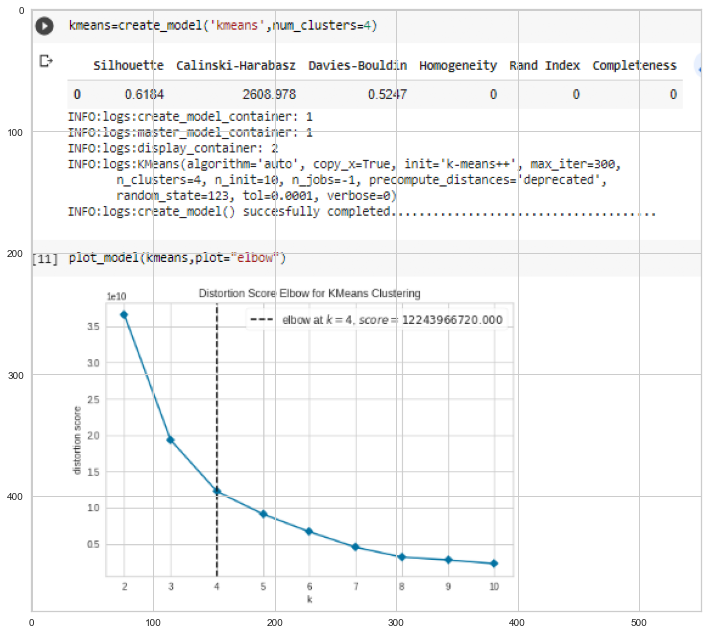

In [27]:
plt.figure(figsize=(12,12))
img=plt.imread('pycaret.PNG')
plt.imshow(img)
plt.show();